Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

#This line will make the plots appear automatically for us without having to do plt 
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

np.random.seed(0)

In [2]:
# This step will load the dataset MNIST from keras. 
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist. load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualize Examples

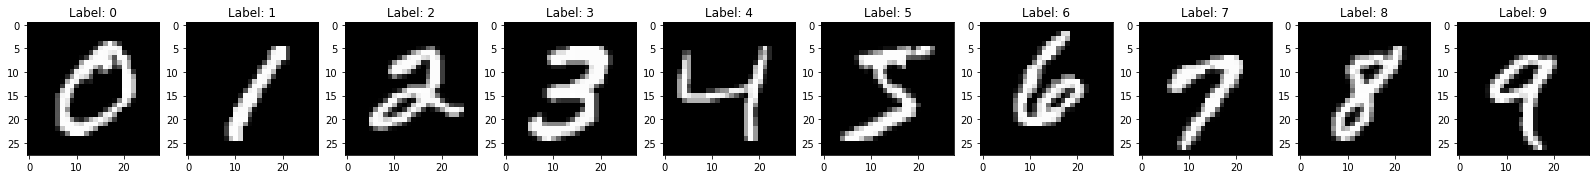

In [4]:
#In our training dataset we have 60,000 images of 28 weight by 28 size with 60,000 labels.
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(28,28))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap ='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=12)

Create Vector 

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#We create a vector of size 10. 
#We fill the vector with 0's except for the index where our number is. This way our network will learn to predict the exact value for the class.
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Prepare Data

In [6]:
#Normalize Data. We choose 255 because that will represent white (our number as it appears within the images)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
#Reshape Data. We want to pass one long vector to the neural network by flattening it
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


Create Model Neural Network

In [8]:
#This model will hold our layers
model = Sequential()

#Adding our input layers
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))

#Output 10 different neurons because these are going to be our classifiers for our 10 digits
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Training Stage

In [10]:
batch_size = 512
epochs=10
model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs)

Epoch 1/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0360 - accuracy: 0.9899
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0300 - accuracy: 0.9919
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0265 - accuracy: 0.9924
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0229 - accuracy: 0.9939
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0202 - accuracy: 0.9944
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0169 - accuracy: 0.9959
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0147 - accuracy: 0.9964
Epoch 8/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0126 - accuracy: 0.9970
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0115 - accuracy: 0.9973
Epoch 10/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0096 - accura

Evaluate

In [11]:
#We will generate the probability for every element to belong to a single class.
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9793
Test Loss: 0.0766206905245781, Test Accuracy: 0.9793000221252441


In [12]:
y_pred = model.predict(x_test)
#Argmax will go to every row and check the highest probability to generate an index
y_pred_classes = np.argmax(y_pred, axis=1)
#Print the probabilities
print(y_pred)
#Print the number from the classification 
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.2959273e-09 4.6515107e-09 3.1151964e-07 ... 9.9992317e-01
  1.6042233e-09 2.4591865e-05]
 [4.9809972e-11 7.9046248e-07 9.9999911e-01 ... 6.2235122e-14
  1.9370459e-08 8.4778257e-15]
 [9.2653700e-08 9.9976730e-01 3.2637752e-05 ... 5.6026798e-05
  8.9700901e-05 1.8727845e-07]
 ...
 [2.3375896e-16 3.0165776e-13 1.1652713e-15 ... 1.8327706e-08
  3.0905345e-10 7.6526568e-08]
 [9.8664783e-14 1.1294622e-16 1.4383809e-14 ... 2.7491412e-13
  3.7891351e-08 1.9128062e-14]
 [2.7523326e-12 4.5144295e-14 2.2645921e-14 ... 1.4235537e-16
  7.5976622e-13 9.8123513e-22]]
[7 2 1 ... 4 5 6]


Trying an example with the model

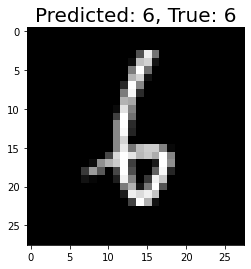

In [13]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=20)
plt.imshow(x_sample.reshape(28,28), cmap='gray')